## Netflix 데이터 분석 목표

1. 데이터 파악

2. 데이터 전처리
- 결측치 처리
- 피처 엔지니어링(파생변수 생성)
3. 데이터 분석을 통한 인사이트 도출 

   1) 오징어 게임 검색
   
   2) movie & tv show 비율 시각화
   
   3) 연도별 movie & tv show 수치 시각화
   
   4) 월별 movie & tv show 수치 시각화
   
   5) 나라별 타겟팅하는 연령 시각화
   
   6) 워드클라우드(핵심 단어 시각화) 

### 1. data 파악 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
netflix = pd.read_csv("/Users/myeongjinlee/Downloads/netflix_titles.csv")

In [4]:
# 컬럼 명 확인
netflix.columns #12개 확인 

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [5]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


## data 전처리 

## 1. 결측치 처리 

In [7]:
#컬럼별 결측치 비율 계산 
#.isna() : 결측 T, 아니면 F 반환 

for i in netflix.columns:
    missingValueRate = netflix[i].isna().sum() / len(netflix)*100
    if missingValueRate > 0:
        print("{}null rate:{}%".format(i,round(missingValueRate,2)))

directornull rate:29.91%
castnull rate:9.37%
countrynull rate:9.44%
date_addednull rate:0.11%
ratingnull rate:0.05%
durationnull rate:0.03%


### 1. .fillna()
- 결측치를 특정값으로 채우거나 대체하여 처리
- 원본 객체를 변경하려면 inplace = True 옵션 추가 

### 2. replace(np.nan,'문자')
- 결측치를 문자열 바꾸기; 함수를 통해 처리 
- np.nan은 결측치를 의미하며, 문자로 변경 시켜줌

### 3. .dropna(axis=0)
- 결측치가 존재하는 행 전체 제거 

In [8]:
#fillna 이용 결측치 특정값으로 채우거나 대체 
#원본 객체를 변경하려면 inplace = True 옵션 추가 
# 결측치 비율 country =9.44% 
netflix['country'].fillna('No Data', inplace = True)

In [9]:
#replace 이용
# 결측치 비율 directornull rate:29.91%,castnull rate:9.37%
netflix['director'].replace(np.nan,'No Data',inplace = True)
netflix['cast'].replace(np.nan,'No Data',inplace = True)

In [10]:
#dropna 이용
#.dropna(axis=0): 결측치가 있는 행 전체 제거
#date_addednull rate:0.11% , ratingnull rate:0.05% , durationnull rate:0.03%
netflix.dropna(axis=0, inplace=True)

In [11]:
#처리된 결측치 확인
netflix.info() # 8807 -17 = 8790 된걸 알 수 있음. 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   cast          8790 non-null   object
 5   country       8790 non-null   object
 6   date_added    8790 non-null   object
 7   release_year  8790 non-null   int64 
 8   rating        8790 non-null   object
 9   duration      8790 non-null   object
 10  listed_in     8790 non-null   object
 11  description   8790 non-null   object
dtypes: int64(1), object(11)
memory usage: 892.7+ KB


In [12]:
netflix.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


## 2. Feature Engineering(1) - 기존 변수 활용 새로운 정보 추가 생성 

### 1. Netflix date_added 변수 활용 year_added(개봉연도)와 month_added(개봉한 월) 정보를 변수로 생성 

- .to_datetime(): 시간 형식의 오브젝트타입 컬럼을 datetime 타입으로 변환
- .dt.year : datetime에서 연도 정보 추출
- .dt.month : datetime에서 월 정보 추출 

In [13]:
netflix["date_added"] = pd.to_datetime(netflix['date_added'])
netflix["date_added"]

0      2021-09-25
1      2021-09-24
2      2021-09-24
3      2021-09-24
4      2021-09-24
          ...    
8802   2019-11-20
8803   2019-07-01
8804   2019-11-01
8805   2020-01-11
8806   2019-03-02
Name: date_added, Length: 8790, dtype: datetime64[ns]

In [14]:
#year_added에 연도 정보 저장
#month_added에 월 정보 저장 
#.dt.year 연도정보 추출
#.dt.month 월 정보 추출 

netflix['year_added'] = netflix['date_added'].dt.year
netflix['month_added'] = netflix['date_added'].dt.month
netflix.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",No Data,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9


### 2. 시청 등급 설명표를 참고하여 netflix의 rating 변수를 이용한 age_group(시청등급) 정보를 변수로 생성 

- .map(): 사전에 정의한 내용을 변수에 적용
- 넷플릭스 시청 등급 설명표

In [15]:
#rating 변수의 값 파악 
netflix['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [16]:
 # 2. 시청 등급 설명표를 참고하여 Netflix의 rating 변수를 이용한 age_group 변수 생성
# netflix['age_group']를 생성하여 netflix['rating'] 값 삽입
# age_group 변수에 딕셔너리로 시청 등급에 대한 key, value 선언
# .map( ) : 사전에 정의한 내용을 변수에 적용

netflix['age_group'] = netflix['rating']

age_group = {'TV-MA': 'Adults',
            'R': 'Adults',
            'PG-13': 'Teens',
            'TV-14': 'Young Adults',
            'TV-PG': 'Older Kids',
            'NR': 'Adults',
            'TV-G': 'Kids',
            'TV-Y': 'Kids',
            'TV-Y7': 'Older Kids',
            'PG': 'Older Kids',
            'G': 'Kids',
            'NC-17': 'Adults',
            'TV-Y7-FV': 'Older Kids',
            'UR': 'Adults'}

netflix['age_group']=netflix['age_group'].map(age_group)

In [17]:
netflix.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,age_group
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9,Teens
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,Adults


## 3. 데이터 분석을 통한 인사이트 도출 

###   1) 오징어 게임 검색
   
   - 오징어 게임을 검색한 조건을 netflix 원본 데이터에 넣어서 True인 값만 출력
   - `str.contains( )` : 지정한 문자열이 포함되어 있으면 True 반환, 그 외에는 False 반환
   > - na = False : 값이 NA일 경우, False로 처리
   > - case = Fasle : 대소문자를 구분하지 않고 검색 
   
   
   
  

In [18]:
# Squid Game(오징어 게임) 검색
# str.contains() : 지정한 문자열이 포함되어 있으면 True 반환, 그 외에는 False 반환
# na = False : 값이 NA일 경우, False로 처리
# case = Fasle : 대소문자를 구분하지 않고 검색  	

netflix["title"].str.contains('squid game',na =False,case =False)

0       False
1       False
2       False
3       False
4       False
        ...  
8802    False
8803    False
8804    False
8805    False
8806    False
Name: title, Length: 8790, dtype: bool

In [19]:
# 오징어 게임을 검색한 조건을 netflix 원본 데이터에 넣어서 True인 값만 출력
netflix[netflix["title"].str.contains('Squid Game',na=False , case =False)]


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,age_group
33,s34,TV Show,Squid Game,No Data,"Lee Jung-jae, Park Hae-soo, Wi Ha-jun, Oh Youn...",No Data,2021-09-17,2021,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Thrillers",Hundreds of cash-strapped players accept a str...,2021,9,Adults


### 2) movie & tv show 비율 시각화

In [20]:
#movie&tv show의 각각 value-counts cnffur
# .value_counts(): rkqtdml rotn cnffur
netflix['type'].value_counts()

Movie      6126
TV Show    2664
Name: type, dtype: int64

In [21]:
# .T: 전치(Transpose) 변환
ratio = pd.DataFrame(netflix['type'].value_counts()).T
ratio

,Movie,TV Show
type,6126,2664


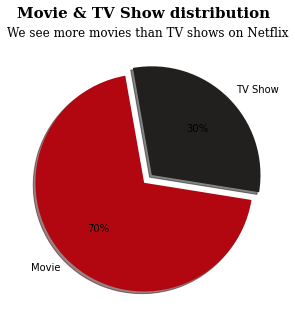

In [22]:
# pie plot 통해 Movies & TV shows 각각 비율 시각화

# plt.pie의 매개변수 설명 
# labels : 부채꼴 조각 이름
# autopct : 부채꼴 안에 표시될 숫자 형식 지정
#           문자열에서 % 포맷팅으로 %0.f 형태로 사용하면 소수점 없이 정수처럼 인식
#           진짜 %를 표시하기 위해 %%로 작성
# startangle : 부채꼴이 그려지는 시작 각도 설정, 90이면 12시 방향
# explode : 부채꼴이 파이 플롯의 중심에서 벗어나는 정도 설정
# shadow : 그림자 효과 표시

plt.figure(figsize=(5,5))
plt.pie(ratio.loc['type'], labels=ratio.columns, autopct='%0.f%%', startangle=100, explode=[0.05, 0.05], shadow=True,
        colors=['#b20710', '#221f1f'])

## (2023년 5월 업데이트) 
## 만약 plt.pie 함수에서 ratio 삽입시 오류가 발생하면 ratio.loc['type'] 입력해 주세요.  
## 오류가 발생하시는 분이 계셔 강의자료에 주석을 추가합니다.
## ratio.loc['type']는 ratio에서 특정 행인 'type'만 추출하여 1차원으로 변경하여 pie 차트에 x값으로 넣어준거예요.
## 이름 검색할 때 loc 함수 썼던거 기억 하시죠?! 화이팅~!  



# plt.suptitle : 전체 플롯의 제목
# plt.title : 서브 플롯의 제목 
plt.suptitle('Movie & TV Show distribution',fontfamily = 'serif',fontsize =15,fontweight ='bold')
plt.title('We see more movies than TV shows on Netflix',fontfamily = 'serif',fontsize=12)

plt.show()

### 3) 연도별 movie & tv show 수치 시각화

- `countplot( )` : 각 범주에 속하는 데이터의 개수를 막대 그래프 시각화
> - data : 카운트 플롯에서 사용할 데이터 셋
> - x : x축 설정
> - hue : 특정 열 데이터로 색상을 구분하여 출력


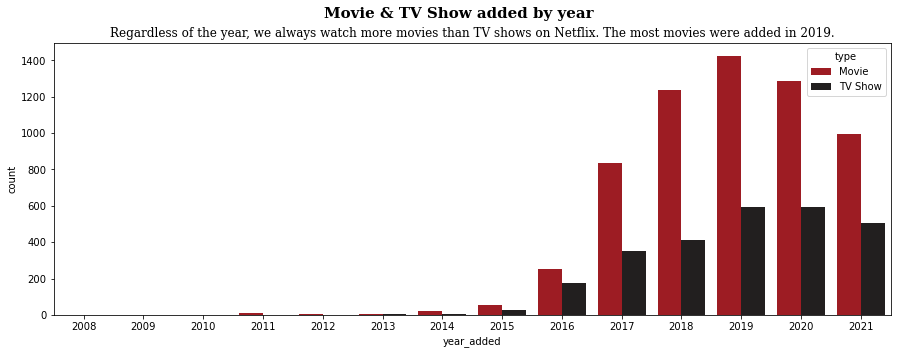

In [23]:
# 연도별 Movies & TV shows 수치 시각화
# 항상 Movies가 TV shows보다 압도적인지 궁금!
# countplot( ) : 각 범주에 속하는 데이터의 개수를 막대 그래프 시각화
# data : countplot에서 사용할 데이터 셋
# x : x축 설정
# hue : 특정 열 데이터로 색상을 구분하여 출력
plt.figure(figsize=(15, 5))

sns.countplot(data=netflix, x='year_added', hue='type', palette=['#b20710', '#221f1f'])

plt.suptitle('Movie & TV Show added by year', fontfamily='serif', fontsize=15, fontweight='bold')
plt.title('Regardless of the year, we always watch more movies than TV shows on Netflix. The most movies were added in 2019.', fontfamily='serif', fontsize=12)

plt.show()


### 4 Netflix 월별 Movie & TV show 수치 시각화**
- `unstack( )` : 인덱스를 컬럼으로 바꾸는 역할
> - <-> stack( ) : 컬럼을 인덱스로 바꾸는 역할
- `fill_between( )` : x축을 기준으로 그래프 영역을 채우는 함수
> - <-> fill_betweenx( ) : y축을 기준으로 그래프 영역을 채우는 함수
> - x : 곡선을 정의하는 노드의 x 좌표
> - y1 : 첫 번째 곡선을 정의하는 노드의 y 좌표
> - y2 : 두 번째 곡선을 정의하는 노드의 y 좌표
> - label : 'Movie', 'TV Show' 문자열 입력
> - alpha : 투명도 

- `xticks(x, month_name)` : x축의 눈금 레이블에 month_name 값의 순서대로 설정

In [24]:
# 월별로 Movies & TV shows 수치 출력
# .groupby( ) : 그룹별 집계, 개봉한 월로 묶고 타입의 개수 구하기
# .value_counts( ) : 값의 개수 출력
# .unstack( ) : 인덱스를 컬럼으로 바꾸는 역할(wide 포맷)
netflix_month = netflix.groupby('month_added')['type'].value_counts().unstack()
netflix_month

type,Movie,TV Show
month_added,,
1,545,192
2,382,180
3,528,213
4,549,214
5,439,193
6,492,236
7,565,262
8,518,236
9,518,251


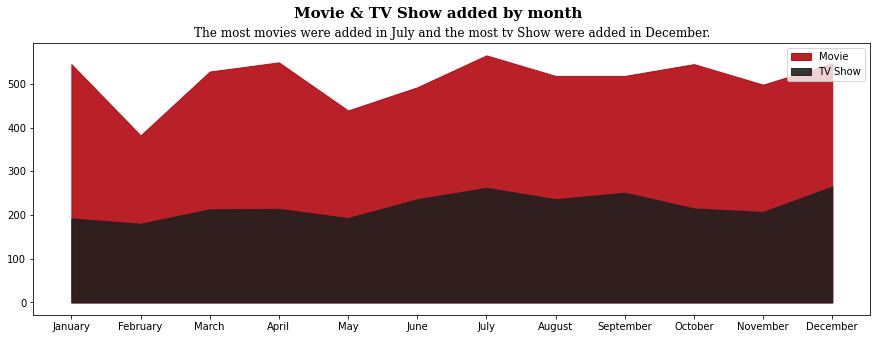

In [25]:
# 월별로 Movies & TV shows 수치 시각화

# fill_between() : x축을 기준으로 그래프 영역을 채우는 함수
# x : 곡선을 정의하는 노드의 x 좌표
# y1 : 첫 번째 곡선을 정의하는 노드의 y 좌표
# y2 : 두 번째 곡선을 정의하는 노드의 y 좌표
# alpha : 투명도 
# label : 'Movie', 'TV Show' 문자열 입력

# xticks(x, month_name) : x축의 눈금 레이블에 month_name 값의 순서대로 설정
# legend() 함수를 사용해서 그래프에 범례 표시
plt.figure(figsize=(15, 5))
 
plt.fill_between(x=netflix_month['Movie'].index,y1=0,y2=netflix_month['Movie'],color='#b20710',alpha=0.9,label = 'Movie')
plt.fill_between(x=netflix_month['TV Show'].index,y1=0,y2=netflix_month['TV Show'],color='#221f1f',alpha=0.9,label = 'TV Show')

plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 
           ['January', 'February', 'March', 'April', 'May', 'June', 
            'July', 'August', 'September', 'October', 'November', 'December'])  

plt.legend()

plt.suptitle('Movie & TV Show added by month', fontfamily='serif', fontsize=15, fontweight='bold')
plt.title('The most movies were added in July and the most tv Show were added in December.', fontfamily='serif', fontsize=12)

plt.show()

## **15. Netflix 나라별 타겟팅하는 연령 시각화**
- `heatmap( )` : 직사각형 데이터를 색으로 행렬을 표현하여 시각화
열을 뜻하는 heat와 지도를 뜻하는 map을 결합시켜 색상으로 다양한 정보를 제공
> - cmp : 시각화 시키는 컬러맵
> - linewidth : 각 셀을 분할할 선의 너비
> - annot : True라면 각 셀에 데이터 값 표시
> - fmt : 문자열 형식화 코드
>        .0% = X
>        .1% = X.x
>        .2% = X.xx 

- `plt.matplotlib.colors.LinearSegmentedColormap.from_list( )` : 컬러맵 생성 


In [26]:
# 나라별 타겟팅하는 연령 수치화 
# .groupby( ) : 그룹별 집계, 시청 등급으로 묶고 나라의 개수 구하기
# .value_counts( ) : 값의 개수 출력
# .unstack( ) : 인덱스를 컬럼으로 바꾸는 역할(wide 포맷)
netflix_age_country = netflix.groupby('age_group')['country'].value_counts()
print(netflix_age_country)
netflix_age_country = netflix.groupby('age_group')['country'].value_counts().unstack()
netflix_age_country

age_group     country                               
Adults        United States                             1403
              No Data                                    287
              India                                      253
              United Kingdom                             214
              Spain                                      122
                                                        ... 
Young Adults  United States, South Korea, China            1
              United States, Taiwan                        1
              United States, United Kingdom, Morocco       1
              United States, Venezuela                     1
              Venezuela                                    1
Name: country, Length: 1033, dtype: int64


country,", France, Algeria",", South Korea",Argentina,"Argentina, Brazil, France, Poland, Germany, Denmark","Argentina, Chile","Argentina, Chile, Peru","Argentina, France","Argentina, France, United States, Germany, Qatar","Argentina, Italy","Argentina, Spain",...,"Uruguay, Argentina, Germany, Spain","Uruguay, Argentina, Spain","Uruguay, Germany","Uruguay, Guatemala","Uruguay, Spain, Mexico",Venezuela,"Venezuela, Colombia",Vietnam,West Germany,Zimbabwe
age_group,,,,,,,,,,,,,,,,,,,,,
Adults,NaN,1.0,42.0,NaN,1.0,1.0,1.0,1.0,1.0,7.0,...,1.0,1.0,NaN,NaN,1.0,NaN,1.0,3.0,1.0,NaN
Kids,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,1.0
Older Kids,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Teens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Young Adults,1.0,NaN,7.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,3.0,NaN,NaN


In [27]:
# 특정 나라별 타겟팅하는 특정 연령 선택하여 수치화
# .loc[] : 행 이름과 열 이름을 사용하여 특정 행과 열 선택
# .fillna(0, inplace = True) : 결측치를 0으로 대체하여 원본 데이터에 저장
age_order = ['Kids','Older Kids','Teens','Adults']
country_order = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 
                 'France', 'South Korea', 'Spain', 'Mexico', 'Turkey']

netflix_age_country = netflix_age_country.loc[age_order,country_order]

netflix_age_country.fillna(0, inplace = True)
netflix_age_country

country,United States,India,United Kingdom,Canada,Japan,France,South Korea,Spain,Mexico,Turkey
age_group,,,,,,,,,,
Kids,198.0,14.0,42.0,32.0,3.0,12.0,5.0,3.0,2.0,1.0
Older Kids,515.0,151.0,82.0,40.0,60.0,7.0,23.0,6.0,9.0,9.0
Teens,289.0,4.0,8.0,3.0,3.0,1.0,0.0,1.0,1.0,0.0
Adults,1403.0,253.0,214.0,80.0,87.0,83.0,88.0,122.0,85.0,64.0


In [28]:
# 나라별 타겟팅하는 연령별 비율을 알고 싶기 때문에 열(나라)마다 총합을 구하여 각각 나누어주면 연령별 비율을 알 수 있음
# .sum(axis=0) : 열 기준으로 더하기
# .div(axis=1) : 행 기준으로 나누기
netflix_age_country = netflix_age_country.div(netflix_age_country.sum(axis=0),axis=1)
netflix_age_country

country,United States,India,United Kingdom,Canada,Japan,France,South Korea,Spain,Mexico,Turkey
age_group,,,,,,,,,,
Kids,0.082328,0.033175,0.121387,0.206452,0.019608,0.116505,0.043103,0.022727,0.020619,0.013514
Older Kids,0.214137,0.357820,0.236994,0.258065,0.392157,0.067961,0.198276,0.045455,0.092784,0.121622
Teens,0.120166,0.009479,0.023121,0.019355,0.019608,0.009709,0.000000,0.007576,0.010309,0.000000
Adults,0.583368,0.599526,0.618497,0.516129,0.568627,0.805825,0.758621,0.924242,0.876289,0.864865


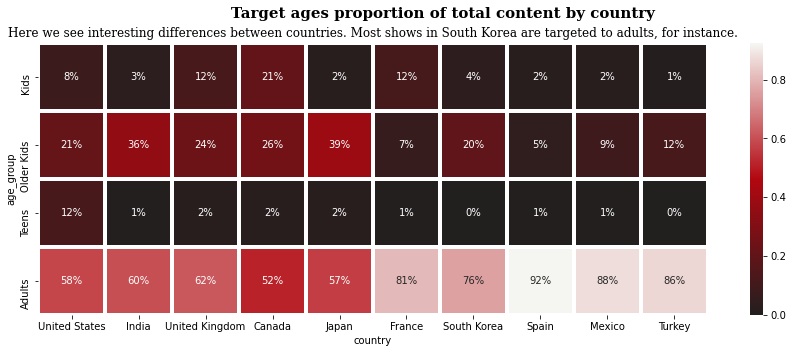

In [29]:
# 나라별 타겟팅하는 연령 시각화하여 인사이트 얻기
# heatmap() : 직사각형 데이터를 색으로 행렬을 표현하여 시각화
#             열을 뜻하는 히트(heat)와 지도를 뜻하는 맵(map)을 결합시켜 색상으로 다양한 정보를 제공
# cmp : 시각화 시키는 컬러맵
# linewidth : 각 셀을 분할할 선의 너비
# annot : True라면 각 셀에 데이터 값 표시
# fmt : 문자열 형식화 코드
#       .0% = X
#       .1% = X.x
#       .2% = X.xx 
# plt.matplotlib.colors.LinearSegmentedColormap.from_list( ) : 컬러맵 생성 
plt.figure(figsize=(15, 5))

cmap = plt.matplotlib.colors.LinearSegmentedColormap.from_list("", ['#221f1f', '#b20710', '#f5f5f1'])


sns.heatmap(netflix_age_country, cmap=cmap, linewidths=2.5, annot=True, fmt='.0%')

plt.suptitle('Target ages proportion of total content by country', fontweight='bold', fontfamily='serif', fontsize=15)
plt.title('Here we see interesting differences between countries. Most shows in South Korea are targeted to adults, for instance.', fontsize=12, fontfamily='serif')

plt.show()


### 4.  Netflix 워드 클라우드
- 워드 클라우드란, 문서의 키워드, 개념 등을 직관적으로 파악할 수 있도록 핵심 단어를 시각화하는 기법

- `from wordcloud import WordCloud` : 워드 클라우드 생성에 필요한 모듈
- `from PIL import Image` : 워드 클라우드를 원하는 형태로 그리기 위해 그림을 불러오는 패키지


- `WordCloud( ).generate(text)` : 선언해준 text에서 wordcloud를 생성
> - `text 변환` : wordcolud에서 작동할 수 있도록 데이터프레임을 list로 1차 변환시키고 str(문자열)로 2차 변환
> - `mask` : 단어를 그릴 위치 설정, 흰색(#FFFFFF) 항목은 마스킹된 것으로 간주
> - `plt.matplotlib.colors.LinearSegmentedColormap.from_list( )` : 컬러맵 생성

- `plt.imshow( )` : array에 색을 채워서 이미지로 표시
- `plt.axis('off')` : 축 삭제


In [30]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


In [31]:
import matplotlib.font_manager
matplotlib.font_manager._rebuild()


In [32]:
!pip install wordcloud --upgrade
!pip install pillow --upgrade

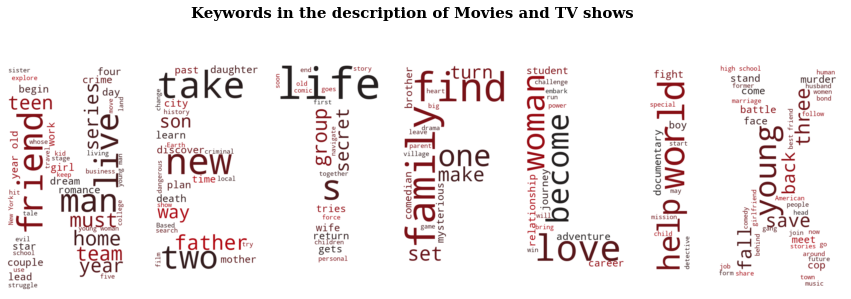

In [35]:
# 넷플릭스 데이터의 description 변수를 이용한 워드 클라우드 생성

# from wordcloud import WordCloud : 워드 클라우드 생성에 필요한 모듈
# from PIL import Image : 워드 클라우드를 원하는 형태로 그리기 위해 그림을 불러오는 패키지

# wordcolud에서 작동할 수 있도록 데이터프레임을 list로 1차 변환시키고 str(문자열)로 2차 변환
# mask : 단어를 그릴 위치 설정, 흰색(#FFFFFF) 항목은 마스킹된 것으로 간주
# plt.matplotlib.colors.LinearSegmentedColormap.from_list( ) : 컬러맵 생성

# WordCloud( ).generate(text) : 선언해준 text에서 wordcloud를 생성
# plt.imshow( ) : array에 색을 채워서 이미지로 표시
# plt.axis('off') : 축 삭제

from wordcloud import WordCloud
from PIL import Image

plt.figure(figsize=(15,5))
text = str(list(netflix['description']))
mask = np.array(Image.open('/Users/myeongjinlee/Downloads/netflix_logo.jpg'))
cmap = plt.matplotlib.colors.LinearSegmentedColormap.from_list("", ['#221f1f', '#b20710'])

# 워드 클라우드 객체 생성
wordcloud_instance = WordCloud(background_color='white', width=1400, height=1400, 
                               max_words=170, mask=mask, colormap=cmap).generate(text)

# 이미지 표시
plt.suptitle('Keywords in the description of Movies and TV shows', fontweight='bold', fontfamily='serif', fontsize=15)
plt.imshow(wordcloud_instance, interpolation="bilinear") 
plt.axis('off') # 축 없애기 
plt.show()

